In [1]:
import os

import cv2
import numpy as np
from insightface.app import FaceAnalysis

/home/tema/.cache/pypoetry/virtualenvs/biometrics-hack-Ov7VMGe3-py3.12/lib/python3.12/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
from numpy.linalg import norm


def cos_metric(vector1: np.ndarray, vector2: np.ndarray) -> float:
    cosine = np.dot(vector1, vector2) / (norm(vector1) * norm(vector2))
    return cosine

In [3]:
def get_vector(app, img_path: str) -> np.ndarray:
    img = cv2.imread(img_path)
    faces = app.get(img)
    return faces[0].normed_embedding

In [5]:
# providers=['CUDAExecutionProvider', 'CPUExecutionProvider']
app = FaceAnalysis(name='antelopev2', root = "./models/", providers=["CPUExecutionProvider"])
app.prepare(ctx_id=0, det_size=(640, 640))

download_path: ./models/models/antelopev2


100%|██████████| 352210/352210 [00:32<00:00, 10800.18KB/s]


AssertionError: 

In [6]:
img = cv2.imread(os.path.join(ROOT_PATH, 'scarlet.jpeg'))
faces = app.get(img)


NameError: name 'ROOT_PATH' is not defined

In [7]:
faces[0]['bbox']

NameError: name 'faces' is not defined

NameError: name 'faces' is not defined

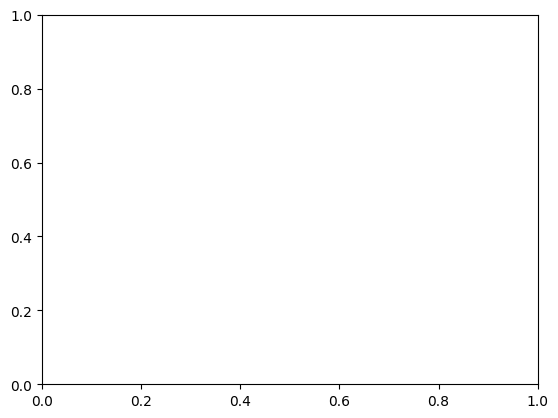

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

cords = faces[0]['bbox']
x = cords[0] - cords[2] / 2
y = cords[1] - cords[3] / 2
print(x, y)
ax.imshow(img)
# Добавление bounding box на график
bounding_box = plt.Rectangle((cords[0], cords[1]), cords[2] - cords[0], cords[3] - cords[1], edgecolor='r', facecolor='none', linewidth=2)
ax.add_patch(bounding_box)


In [9]:
ROOT_PATH = "../assets/examples"

vector_artem = get_vector(app, os.path.join(ROOT_PATH, "artem.jpg"))
vector_max = get_vector(app, os.path.join(ROOT_PATH, "max.jpg"))
vector_scarlet = get_vector(app, os.path.join(ROOT_PATH, "scarlet.jpeg"))
vector_sonya = get_vector(app, os.path.join(ROOT_PATH, "sonya.jpg"))
vector_max2 = get_vector(app, os.path.join(ROOT_PATH, "max2.jpg"))
vector_max3 = get_vector(app, os.path.join(ROOT_PATH, "max3.jpg"))

NameError: name 'app' is not defined

In [16]:
vector_max3 = get_vector(app, os.path.join(ROOT_PATH, "max3.jpg"))

In [9]:
vector_artem.shape

(512,)

In [9]:
print(cos_metric(vector_max, vector_max))
print(cos_metric(vector_artem, vector_scarlet))
print(cos_metric(vector_max, vector_scarlet))
print(cos_metric(vector_sonya, vector_scarlet))
print(cos_metric(vector_max, vector_artem))

1.0000001
-0.041161727
0.0974093
0.035541832
0.04414026


In [8]:
print(cos_metric(vector_max, vector_max2))
print(cos_metric(vector_max, vector_max3))
print(cos_metric(vector_max2, vector_max3))

0.61291605
0.5359313
0.6193128


In [20]:
np.argmax([False, False, True])

np.int64(2)

In [22]:
img

NameError: name 'img' is not defined

In [1]:
import pandas as pd

In [10]:
data

,attachment_id,user_id,data_hash,width,height,brightness,test,train,valid
0,de81cc1c-25f3-45b8-a7a2-ea42ec7c3c7b,1b70f339783ae94172ae47ae511aeb92,e8f7924b9c7021c7,1440.0,1920.0,136.0,True,False,False
1,d17ca986-8ae1-4675-b3f5-69ca024fc2b1,cf16af42fb366a16face9a6f480d8654,a697494173ee8359,1080.0,1920.0,140.0,True,False,False
2,4b99a894-aa73-43a2-b077-143efdc8ef46,f8affcd943ce3dc5d7040bd499c8bfd3,a4f15b8618e9fc1c,1440.0,1920.0,151.0,False,False,True
3,d68f7657-fb0c-4882-bda5-b61ab95fc11c,9c340400bc5aef3e54e932d2320b33f6,b0cb87849cf813f3,1425.0,1920.0,183.0,True,False,False
4,f3307095-20cf-4dc0-acea-0243f40f6d7f,c60b1ae97ab03e6a5cc7dde77af527da,a4d34b962cf2b30d,1434.0,1920.0,177.0,False,True,False
...,...,...,...,...,...,...,...,...,...
19995,c9b6fdbc-9164-416f-9df8-64cb16d6e72b,0bf8258e9c1602253cb4e1ac7cda963c,e63449b51b6135b9,640.0,480.0,136.0,False,True,False
19996,ab661d04-3058-4e82-81ba-437049c1ec64,4a70a8aebc478ca9e2393e00253fceca,f0e025a7a69be781,1440.0,1920.0,109.0,True,False,False
19997,5793c68f-1b82-43ae-99c3-a34ecc5d35c0,49efc176ab5bbdb15f059eac0e474dea,fcf263b2c8a4926c,1920.0,1080.0,98.0,False,True,False
19998,0362d137-21b4-453e-9785-3ce11c0abbdf,d6f605b57c3cfb6989d9aa48c1a61a85,e1e71ae612a29a9b,640.0,360.0,128.0,False,True,False


In [3]:
data = pd.read_csv('../meta.csv')
grouped = data.groupby('user_id')
results = []



In [11]:
for user_id, group in grouped:
    print(user_id)
    # print(group)
    for _, row in group.iterrows():
        print(row['attachment_id'])
    break

000846d038cc6289acf99f0739820896
e70334e6-b385-4db6-90f8-3f967511b082
f6da0358-69bb-4e94-9b70-03c493d2962c
